In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as img
from keras import layers, Sequential
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

2025-09-14 16:08:11.153584: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
klass = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
n = len(klass)

In [3]:
def plot_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Testing Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.show()

In [4]:
def plot_confusion(model, X, y):
    p0 = model.predict(X)
    p = np.argmax(p0, axis=1)
    y = y[:,0]
    C = np.zeros((10, 10))
    for pred, tru in zip(p, y):
        C[int(pred), int(tru)] += 1
    plt.imshow(C)
    plt.xlabel('Truth')
    plt.ylabel('Prediction')
    plt.xticks(range(0,10), list(klass.values()), rotation=90)
    plt.yticks(range(0,10), list(klass.values()))
    plt.colorbar()
    plt.show()

In [5]:
def build_model(fil=64, dor=.5, rf=3, act='relu', ins=(32, 32, 3), nod=128, n=10):
    model = Sequential()
    model.add(layers.Conv2D(fil, (rf, rf), activation=act, input_shape=ins))
    model.add(layers.Conv2D(fil, (rf, rf), activation=act))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(fil*2, (rf, rf), activation=act))
    model.add(layers.Conv2D(fil*2, (rf, rf), activation=act))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Dropout(rate=dor))
    model.add(layers.Flatten())
    model.add(layers.Dense(nod))
    model.add(layers.Dropout(rate=dor))
    model.add(layers.Dense(n, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
X_train = X_train.astype('float64') / 255.
X_test = X_test.astype('float64') / 255.

In [8]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [9]:
model = build_model(ins=X_train.shape[1:], n=10)
model.summary()

/home/sangeetp/.conda/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 671,178 (2.56 MB)

 Trainable params: 671,178 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
callback = EarlyStopping(monitor='val_loss', patience=5)

In [11]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, callbacks=[callback], validation_data=(X_test, Y_test))

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 336s 853ms/step - accuracy: 0.2987 - loss: 1.8674 - val_accuracy: 0.5338 - val_loss: 1.2878
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 332s 848ms/step - accuracy: 0.5420 - loss: 1.2913 - val_accuracy: 0.6318 - val_loss: 1.0344
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 331s 847ms/step - accuracy: 0.6291 - loss: 1.0582 - val_accuracy: 0.6895 - val_loss: 0.8879
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 331s 846ms/step - accuracy: 0.6757 - loss: 0.9284 - val_accuracy: 0.7157 - val_loss: 0.8105
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 329s 842ms/step - accuracy: 0.7008 - loss: 0.8599 - val_accuracy: 0.7407 - val_loss: 0.7539
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 329s 841ms/step - accuracy: 0.7254 - loss: 0.7897 - val_accuracy: 0.7522 - val_loss: 0.7198
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 329s 843ms/step - accuracy: 0.7430 - loss: 0.7451 - val_accuracy: 0.7506 - val_loss: 0.7131
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 329s 842ms/step - accuracy: 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



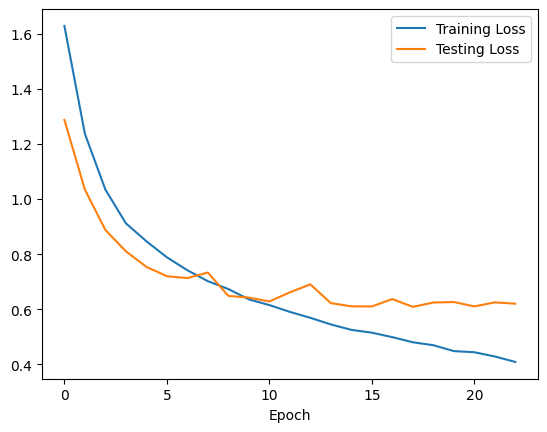

In [12]:
plot_history(history)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step


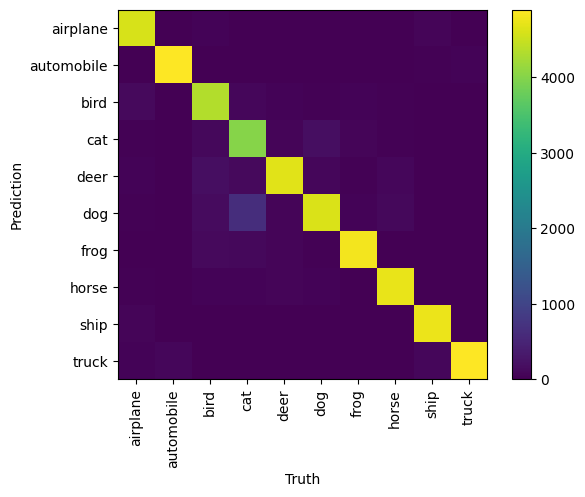

In [13]:
plot_confusion(model, X_train, y_train)